In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('n50.csv')

In [3]:
df

,Date,ADANIPORTS,ASIANPAINT,BAJFINANCE,BAJAJFINSV,BRITANNIA,DIVISLAB,GRASIM,HCLTECH,HDFCBANK,...,NESTLEIND,POWERGRID,RELIANCE,TCS,TATACONSUM,TATASTEEL,TECHM,TITAN,UPL,WIPRO
0,2016-01-01,259.295502,845.420471,601.376526,1978.063965,1374.428223,1103.977783,563.788452,376.525513,526.229126,...,5261.627441,81.026642,484.996368,1075.699219,135.227539,215.094727,444.897156,340.026581,276.159393,200.972641
1,2016-01-04,249.991684,847.392578,597.095093,1953.834106,1368.077148,1091.821899,547.253784,376.570099,517.408325,...,5156.715332,80.997917,475.419189,1054.865845,132.733582,214.676880,441.774689,339.398804,272.083038,201.424088
2,2016-01-05,247.811096,866.489746,591.708557,1940.372925,1365.361694,1089.732788,547.530579,375.167786,513.493286,...,5149.986328,79.963524,480.124207,1045.672852,137.028732,229.217102,446.479858,335.825104,272.992371,201.135117
3,2016-01-06,244.031433,852.780334,602.501221,1932.944580,1381.469971,1079.951294,546.528015,374.544708,515.764954,...,5201.917969,80.164658,493.045013,1060.207764,134.165298,224.579285,449.217377,335.970032,278.040802,200.485031
4,2016-01-07,237.441223,839.263123,602.407532,1921.477905,1356.088135,1070.217407,532.282776,367.266510,510.496552,...,5128.657715,79.360146,483.993256,1055.600342,129.362137,208.827393,436.983917,332.299835,261.766602,198.588898
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1537,2022-03-24,733.450012,3025.350098,6997.549805,16378.700195,3103.850098,4494.649902,1599.400024,1192.099976,1442.650024,...,17345.984375,210.750000,2578.649902,3749.850098,740.500000,1350.550049,1568.550049,2618.500000,799.099976,605.509155
1538,2022-03-25,743.250000,3046.949951,6973.500000,16333.299805,3094.500000,4454.149902,1591.050049,1179.349976,1430.900024,...,17099.964844,209.649994,2595.850098,3707.449951,733.349976,1338.949951,1530.550049,2523.899902,798.549988,598.368591
1539,2022-03-28,737.000000,3027.449951,7001.399902,16518.949219,3094.800049,4416.549805,1610.949951,1163.949951,1432.800049,...,16799.890625,212.300003,2621.949951,3707.699951,741.250000,1338.949951,1524.449951,2535.899902,780.750000,595.244629
1540,2022-03-29,761.950012,3042.600098,7039.350098,16501.699219,3103.800049,4561.600098,1623.699951,1167.699951,1451.800049,...,16861.519531,211.300003,2622.550049,3705.350098,743.200012,1334.650024,1522.349976,2538.800049,782.000000,597.525635


In [4]:
def number_of_years(y):  # calculates the number of years of the dataset
    p = y.index[0]  # date of first row in the dataset (datetime format)
    q = y.index[len(y) - 1]  # date of last row in the dataset  (datetime format)
    return ((q - p).days + 1) / 365  # the difference give the number of total days (not trading days) over the total number of years in the dataset

In [5]:
def ratio(a, b, c):   
    return (a - c) / b  

In [6]:
def BALANCE(weights):
  #Making sure the total sum of the weights eual to 1
  weights = [w/sum(weights) for w in weights] 
  # Making sure all weights represent proportions that add up to 1
  return weights


In [7]:
aco_sortino=pd.DataFrame(columns=['Date', 'Returns', 'Risk','Ratio'])

In [8]:
aco_sortino.columns

Index(['Date', 'Returns', 'Risk', 'Ratio'], dtype='object')

In [9]:
def ACO_Sortino(start_date,end_date,deciding_date,aco_sortino):
    aco_sortino_list=[]
    df = pd.read_csv('n50.csv', parse_dates=['Date'], index_col='Date')
    df=df.loc[start_date:end_date]
    tdf = df.copy()  # deep copy
    df.reset_index(drop=True, inplace=True)
    #trading_days = len(df) / number_of_years(tdf)
    trading_days=1
    returnsh = df.pct_change()  # Here, returnsh would mean return considered for sharpe ratio
    returnsh.fillna(0, inplace=True)  # calculating daily returns of the stocks in the portfolio
    returnso = returnsh.copy()  # this cell considers only NEGATIVE returns so as to calculate sortino ratio
    for cols in returnso.columns.tolist():
        for i in range(0, len(df)):
            if returnso[cols][i] > 0:
                returnso[cols][i] = 0  
    #covmatsh = returnsh.cov() * trading_days  # Annualised covariance matrix calculated wrt returnsh i.e. used to calculate sharpe ratio
    covmatso = returnso.cov() * trading_days  # Annualised covariance matrix calculated wrt returnso i.e. used to calculate sortino ratio
    num_assets = len(df.columns)  # initializing number of stocks/assets considered in the portfolio
    risk_free_rate = 0.0358  # initializing risk free rate that will be used in calculating both the ratios (absolute value)
# referred from url: https://www.rbi.org.in/Scripts/BS_NSDPDisplay.aspx?param=4&Id=24292
# In the above url, the 364 (1 year) day treasury bill is 3.58% , when taken absolute value => 0.0358
# (improved)

# 2021_chen etal_Mean–variance portfolio optimization using machine learning-based stock price prediction
# Repeat the process 50,000times. From a statistical point of view, 50,000 random portfolios cover most possible portfolios with different weights and aresufficiently representative

    global_war_sortino=[]
    sortino_portfolio_return=[]
    sortino_portfolio_risk=[]
    sortino_portfolio_soratio=[]
    sortino_portfolio_stockWeights=[]
    fitness=0
    weights=np.array(BALANCE(np.array([1.29149089343896,6.38196603292408,6.94757438175576,5.8163576840924,5.8163576840924,6.38196603292408,0.725882544607276,4.11953263759736,
                                       7.51318273058744,0.725882544607276,8.07879107941912,1.85709924227064,1.29149089343896,1.85709924227064,5.25074933526072,2.42270759110232,
                                       4.68514098642904,8.07879107941912,4.11953263759736,1.85709924227064,6.94757438175576,5.25074933526072,0.725882544607276,1.85709924227064])))
    returns_temp = np.sum(returnso.mean()*weights)*trading_days 
    varso=np.dot(weights.T,np.dot(covmatso,weights))   
    volatility_temp = np.sqrt(varso)      
    fitness = ratio(returns_temp,volatility_temp,risk_free_rate)
    sortino_portfolio_return.append(returns_temp)
    sortino_portfolio_risk.append(volatility_temp)
    sortino_portfolio_soratio.append(fitness)
    sortino_portfolio_stockWeights.append(weights)
    sortino_portfolio = {'Returns' : sortino_portfolio_return, 'Semi Deviation' : sortino_portfolio_risk,  'Sortino Ratio' : sortino_portfolio_soratio}  
    for counter,symbol in enumerate(df.columns):
      sortino_portfolio[symbol + " Weight"] = [Weight[counter] for Weight in sortino_portfolio_stockWeights]
    sortino_pc = pd.DataFrame(sortino_portfolio)
    sortino_optimal=sortino_pc.iloc[sortino_pc['Sortino Ratio'].idxmax()]
    sortino_optimal=sortino_optimal.to_frame()
    sortino_optimal=sortino_optimal.transpose()
    sortino_optimal.loc[:, :] *= 100
    sortino_optimal.loc[:, 'Sortino Ratio'] /= 100
    to_append=[deciding_date,sortino_optimal['Returns'].values[0],sortino_optimal['Semi Deviation'].values[0],sortino_optimal['Sortino Ratio'].values[0]]
    aco_sortino_series = pd.Series(to_append, index = aco_sortino.columns)
    aco_sortino = aco_sortino.append(aco_sortino_series, ignore_index=True)
    sortino_optimal.to_csv(str(deciding_date)+"ACO_sortino_optimal.csv")
    return aco_sortino


In [10]:
start_date_index=df.index[df['Date'] == "2020-10-01"] 

In [11]:
end_date_index=df.index[df['Date']== "2020-12-31"]

In [12]:
start_date="2020-10-01"

In [13]:
end_date="2020-12-31"

In [14]:
#deciding_date=df.iloc[end_date_index+1].Date.values[0]


In [15]:
while df.iloc[end_date_index].Date.values[0]:
    aco_sortino=ACO_Sortino(df.iloc[start_date_index].Date.values[0],df.iloc[end_date_index].Date.values[0],df.iloc[end_date_index+1].Date.values[0],aco_sortino)
    start_date_index+=1
    end_date_index+=1

IndexError: positional indexers are out-of-bounds

In [16]:
aco_sortino.to_csv('aco_sortino.csv')

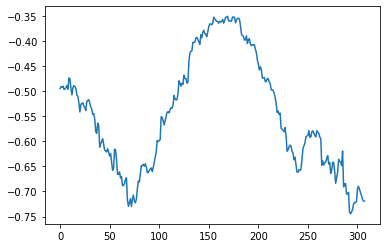

In [17]:
plt.plot(aco_sortino['Returns'])